student id-8878184
Name-Nisarg Patel

In [1]:
# Importing the necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error , mean_squared_error

1.Frame the problem and look at the big picture.
2.Get the data.
3.Explore the data to gain insights.
4.Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5.Explore many different models and short-list the best ones.
6.Fine-tune your models and combine them into a great solution.
7.Present your solution.

1.Given that the target variable has a continuous value, the given problem is a regression problem.
2.Finding the association between a person's BMI and the progression of their condition over the course of a year will probably be more difficult because it can be influenced by other factors like age and sex.
3.People who are at a high risk of rapid illness progression can be helped before any major issues arise by using the Target variable as a predictor based on BMI.

In [2]:
from sklearn import datasets
diabetes_X_NP, diabetes_y_NP = datasets.load_diabetes(return_X_y=True, as_frame=True) 
diabetes_X_NP.head() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
diabetes_y_NP.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [4]:
X = diabetes_X_NP['bmi'] #Using only one feature `bmi` from diabetes_X
y = diabetes_y_NP #represents a quantitative measure of disease progression one year after baseline
X.head()

0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
Name: bmi, dtype: float64

In [5]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
X.shape , y.shape # There are total 442 rows in the dataset

((442,), (442,))

the examination of independent variable X

In [7]:
X.describe()

count    4.420000e+02
mean    -2.245564e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

Given that the range is between 0 and 1, the median and mean appear to be in standardised form.

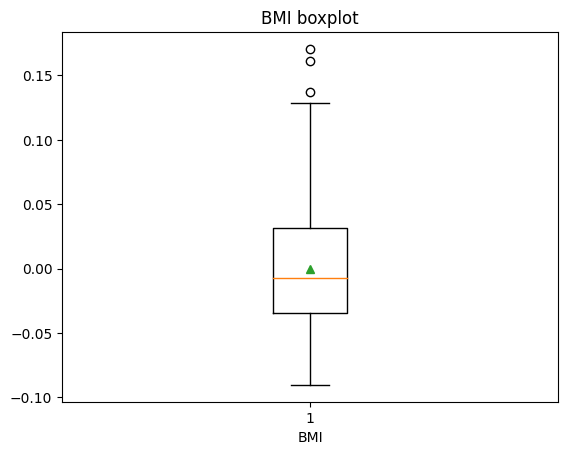

In [8]:
plt.title('BMI boxplot')
plt.xlabel('BMI')
plt.boxplot(X ,showmeans=True) 
plt.show()

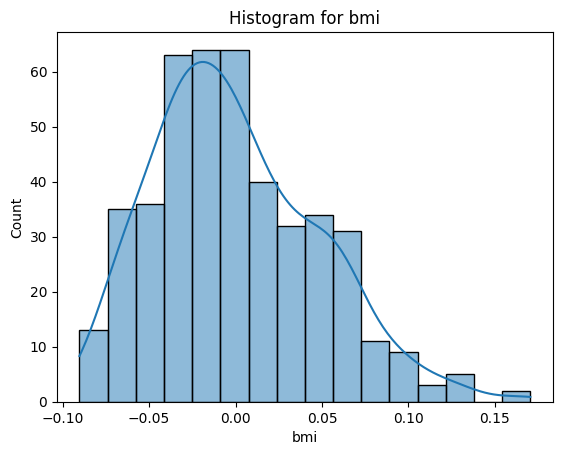

In [9]:
plt.title('Histogram for bmi')
sns.histplot( data= X, kde= True )
plt.show()

In [10]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

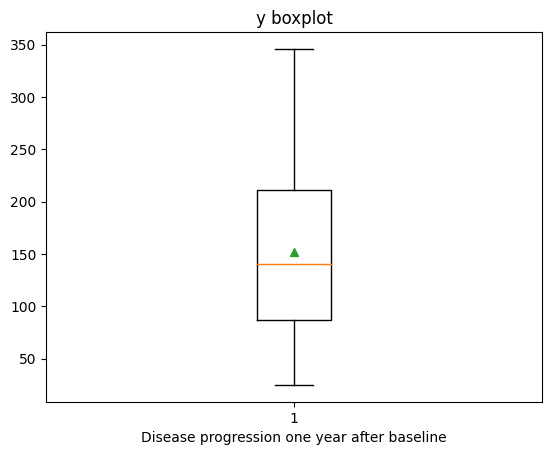

In [11]:
plt.title('y boxplot')
plt.xlabel('Disease progression one year after baseline')
plt.boxplot(y ,showmeans=True)  
plt.show()

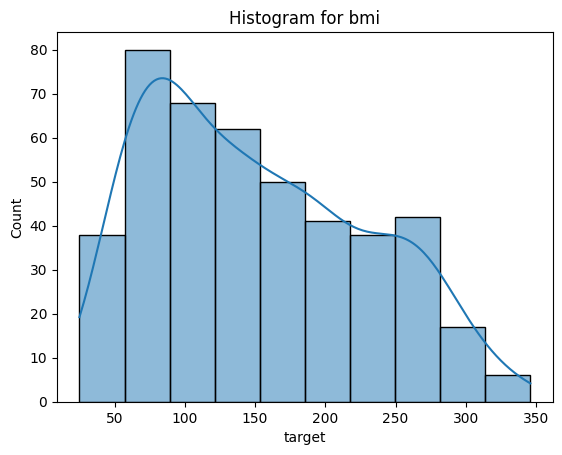

In [12]:
plt.title('Histogram for bmi')
sns.histplot( data= y, kde= True )
plt.show()


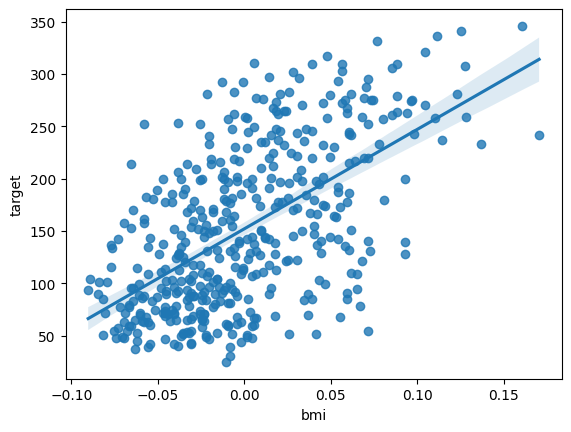

In [13]:
sns.regplot(x= X, y=y )
plt.show()

-X and y have a favourable relationship.
-There is, nevertheless, a moderate relationship.
-BMI cannot, therefore, be a very useful feature in order to forecast the y.

In [15]:
# reshaping the X in the format which is expected by the model
# Also converting X and y to numpy arrays

X = np.array(X).reshape(-1,1)
y = np.array(y)

X.shape

(442, 1)

In [16]:
# Importing train_test_split
from sklearn.model_selection import train_test_split 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-data is split into two groups Testing and Training
The model will be trained on the training data, and the testing data will be used to evaluate the model. Training contains 80% of the entire data, and the remaining 20% is the testing data.

In [18]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((353, 1), (353,), (89, 1), (89,))

In [19]:
# Train the model
from sklearn.linear_model import LinearRegression #importing the linear regression model

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

-solution

In [21]:
# The coefficients and intercept
print('Coefficients or the Slope(m) of the model is: \t', model.coef_[0])
print('intercept(c) of the model is: \t',model.intercept_)

# Finding the error in Testing dataset
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean Absolute error: %.2f' % mean_absolute_error(y_test, y_pred))

# Finding the error in Training dataset
print('Mean squared error: %.2f' % mean_squared_error(y_train, y_pred_train))
print('Mean Absolute error: %.2f' % mean_absolute_error(y_train, y_pred_train))

Coefficients or the Slope(m) of the model is: 	 998.5776891375593
intercept(c) of the model is: 	 152.00335421448167
Mean squared error: 4061.83
Mean Absolute error: 52.26
Mean squared error: 3854.11
Mean Absolute error: 51.38


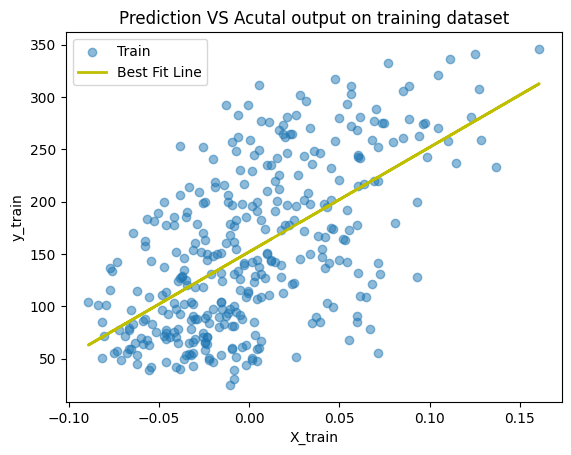

In [24]:
# Plot outputs for Test dataset
plt.title('Prediction VS Acutal output on training dataset')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.scatter(X_train, y_train, label = 'Train' , alpha=0.5) # Actual Values
plt.plot(X_train, y_pred_train, color='y', linewidth=2 , label = 'Best Fit Line') # Predicted Values
plt.legend()
plt.show()

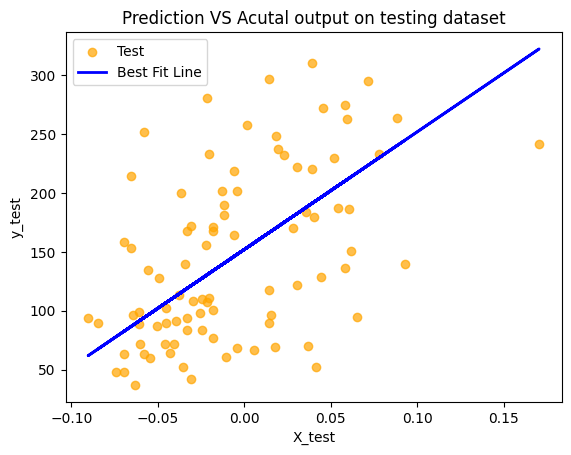

In [23]:
# Plot outputs for Test dataset
plt.title('Prediction VS Acutal output on testing dataset')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.scatter(X_test, y_test , label= 'Test' , color= 'orange', alpha=0.7) # Actual Values
plt.plot(X_test, y_pred, color='b', linewidth=2 , label = 'Best Fit Line') # Predicted Values
plt.legend()
plt.show()

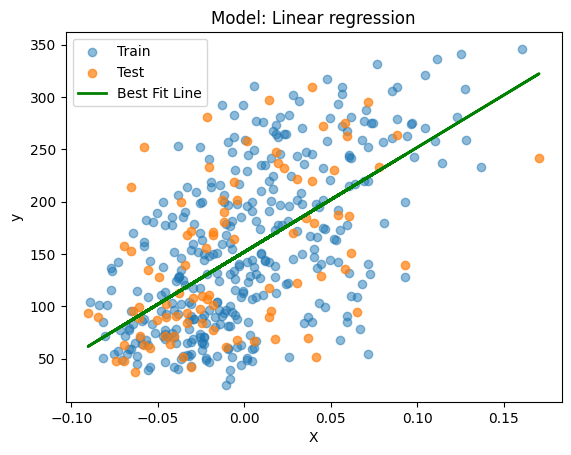

In [26]:
# Plot outputs for Model
plt.title('Model: Linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X_train, y_train, label = 'Train' , alpha=0.5) # training data
plt.scatter(X_test, y_test , label= 'Test' , alpha=0.7) # testing data
plt.plot(X_test, y_pred, color='g', linewidth=2 , label = 'Best Fit Line') # Best fit line
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import r2_score
print('The model gives the accuracy of: %.2f'%(r2_score(y_test,y_pred)*100), '%')


The model gives the accuracy of: 23.34 %


-The model's accuracy is really low; therefore, to increase the model's accuracy, we can:

